# **Question 1 Part 2**

Based on the challenge of the XOR gate for getting output 1 only when the both inputs are different. Theresfore it is not linearly separable.

In [ ]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

Single layer perceptron applied below fails to classify the XOR problem

In [ ]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # +1 for bias term
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # w.x + b
        return self.activation_function(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)  # Bias update

perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

for inputs in X:
    print(f"Input: {inputs}, Predicted Output: {perceptron.predict(inputs)}")


Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


Multi layer perceptron which has a hidden layer and it correctly classifies the XOR gate using the nonlinear functions like tanh used below.

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(2,),
                    activation='tanh',
                    solver='adam',
                    learning_rate_init=0.01,
                    max_iter=10000,
                    random_state=42)
mlp.fit(X, y)

for inputs in X:
    print(f"Input: {inputs}, Predicted Output: {mlp.predict([inputs])[0]}")

Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0


# **Question 2**

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the IMDb dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}')


Training data shape: (25000,), Training labels shape: (25000,)
Testing data shape: (25000,), Testing labels shape: (25000,)


Preprocessing steps:
1. padding sequence,to ensure all reviews have equal length
2. train-test split

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 300

x_train_padded = pad_sequences(x_train, maxlen=maxlen)
x_test_padded = pad_sequences(x_test, maxlen=maxlen)

print(f'Padded Training data shape: {x_train_padded.shape}')


Padded Training data shape: (25000, 300)


ANN consists of the input layer, output layer, hidden layer and loss function

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(x_train_padded, y_train, epochs=5, batch_size=64, validation_data=(x_test_padded, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step - accuracy: 0.6960 - loss: 0.5306 - val_accuracy: 0.8608 - val_loss: 0.3191
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9720 - loss: 0.0816 - val_accuracy: 0.8539 - val_loss: 0.4142
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 81ms/step - accuracy: 0.9975 - loss: 0.0095 - val_accuracy: 0.8591 - val_loss: 0.5805
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.8608 - val_loss: 0.7051
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 1.0000 - loss: 6.1539e-05 - val_accuracy: 0.8615 - val_loss: 0.7498


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8608 - loss: 0.7504
Test Accuracy: 86.15%


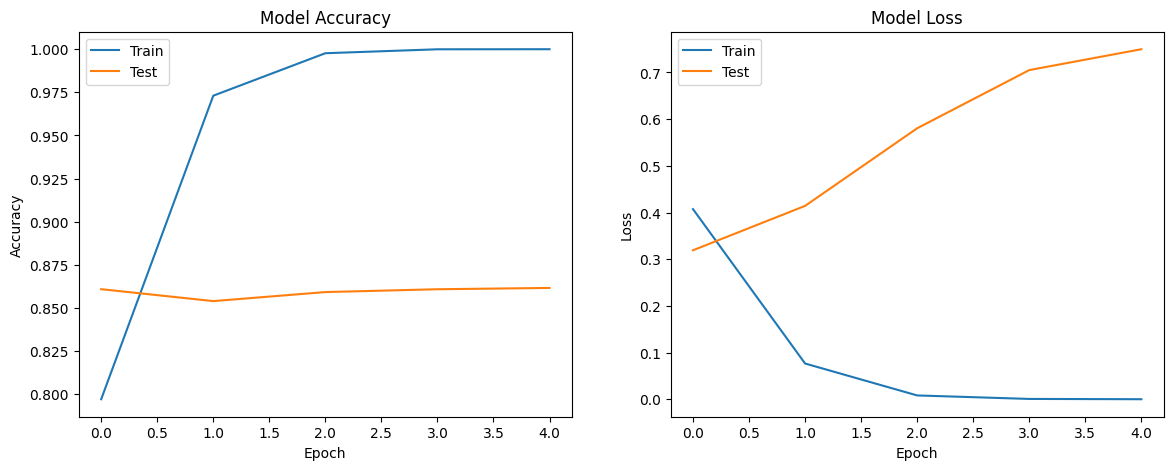

In [22]:
import matplotlib.pyplot as plt

test_loss, test_acc = model.evaluate(x_test_padded, y_test)
print(f'Test Accuracy: {test_acc*100:.2f}%')

def plot_metrics(history):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

plot_metrics(history)


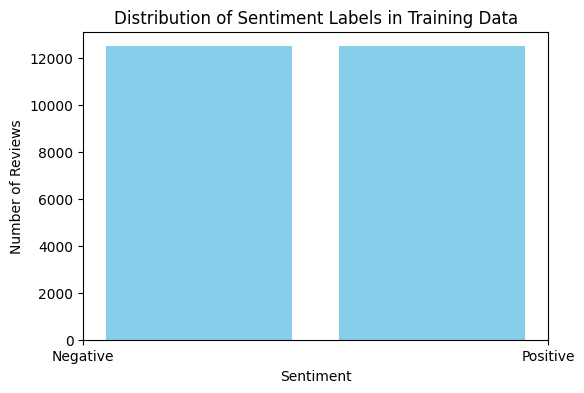

In [23]:
plt.figure(figsize=(6, 4))
plt.hist(y_train, bins=2, rwidth=0.8, color='skyblue')
plt.title('Distribution of Sentiment Labels in Training Data')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


Helps us understand the distribution of positive (1) and negative (0) reviews are of equal distribution.

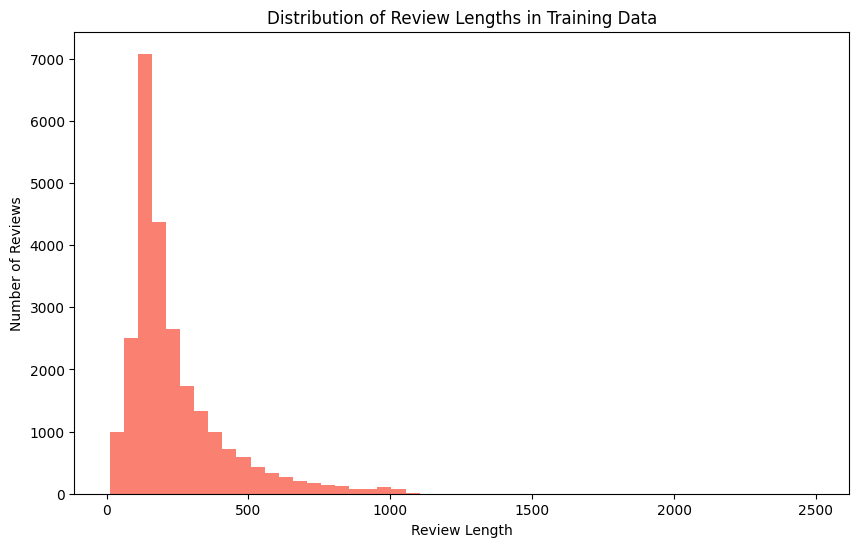

In [27]:
train_review_lengths = [len(review) for review in x_train]
test_review_lengths = [len(review) for review in x_test]

plt.figure(figsize=(10, 6))
plt.hist(train_review_lengths, bins=50, color='salmon')
plt.title('Distribution of Review Lengths in Training Data')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()


 How long the reviews are on average, we can observe that review length 150 is highest

In [24]:
word_index = imdb.get_word_index()

index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0], index_to_word[1], index_to_word[2] = '<PAD>', '<START>', '<UNK>'

def decode_review(encoded_review):
    return ' '.join([index_to_word.get(i, '?') for i in encoded_review])

print(f'First review: {decode_review(x_train[0])}')
print(f'Label: {"Positive" if y_train[0] == 1 else "Negative"}')


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
First review: <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole fi

Top 10 most frequent words: ['<UNK>', 'the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it']


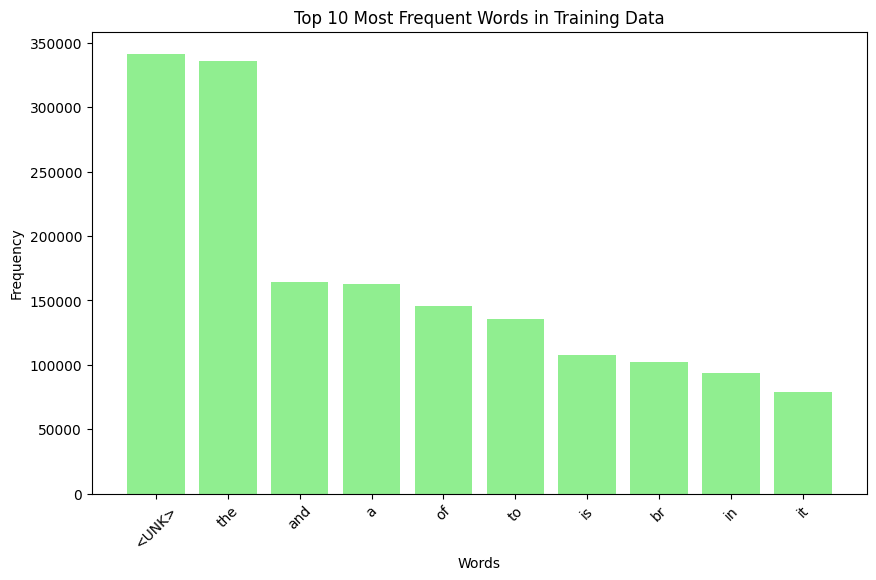

In [26]:
from collections import Counter
all_words = [word for review in x_train for word in review]

word_freq = Counter(all_words)

common_words = word_freq.most_common(10)
common_word_indices = [index_to_word[i] for i, _ in common_words]

print(f'Top 10 most frequent words: {common_word_indices}')

plt.figure(figsize=(10, 6))
plt.bar([index_to_word[i] for i, _ in common_words], [count for _, count in common_words], color='lightgreen')
plt.title('Top 10 Most Frequent Words in Training Data')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The most frequent words are mentioned from this graph.

**ReLU (Rectified Linear Unit):** It's widely used in hidden layers due to its efficiency in handling vanishing gradient problems and allowing for faster convergence.

**Sigmoid:** The sigmoid function outputs probabilities between 0 and 1, making it suitable for binary classification problems.

**Binary Cross-Entropy** is used as the loss function for this task because:

It's designed for binary classification tasks.

*   It's designed for binary classification tasks.
*   It measures the performance by comparing the predicted probability (from the sigmoid function) to the actual label (0 or 1).
*   The loss penalizes the model more when confident predictions are incorrect.




